In [10]:
import matplotlib.pyplot as plt
import scienceplots
from tbparse import SummaryReader

plt.style.use('science')
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (14,6)
plt.rcParams.update({'font.size': 18})

In [70]:
import json
from fedswarm import Platform
from fedswarm.utils.data.utils.oxts import plot_predictions, present_predictions, visualize_car_points
from fedswarm.utils.models.model_manager import load_model_from_checkpoint

with open("runs/2023-05-25_22:27:07/config.json") as f:
    config = json.load(f)
model = load_model_from_checkpoint("runs/2023-05-25_22:27:07/best_model.pth", config)

# load the platform with the config
platform = Platform(config, data_only=True)

FixMatchSeg is not well supported, please use it with caution as config validation may not work


Same run already exists, skipping run but creates platform
Run found in 2023-05-25_22:27:07


Loading train frames:   0%|          | 0/89976 [00:00<?, ?it/s]

Loading val frames:   0%|          | 0/10024 [00:00<?, ?it/s]

In [79]:
model_2 = load_model_from_checkpoint("runs/2023-05-25_22:19:10/best_model.pth", config)

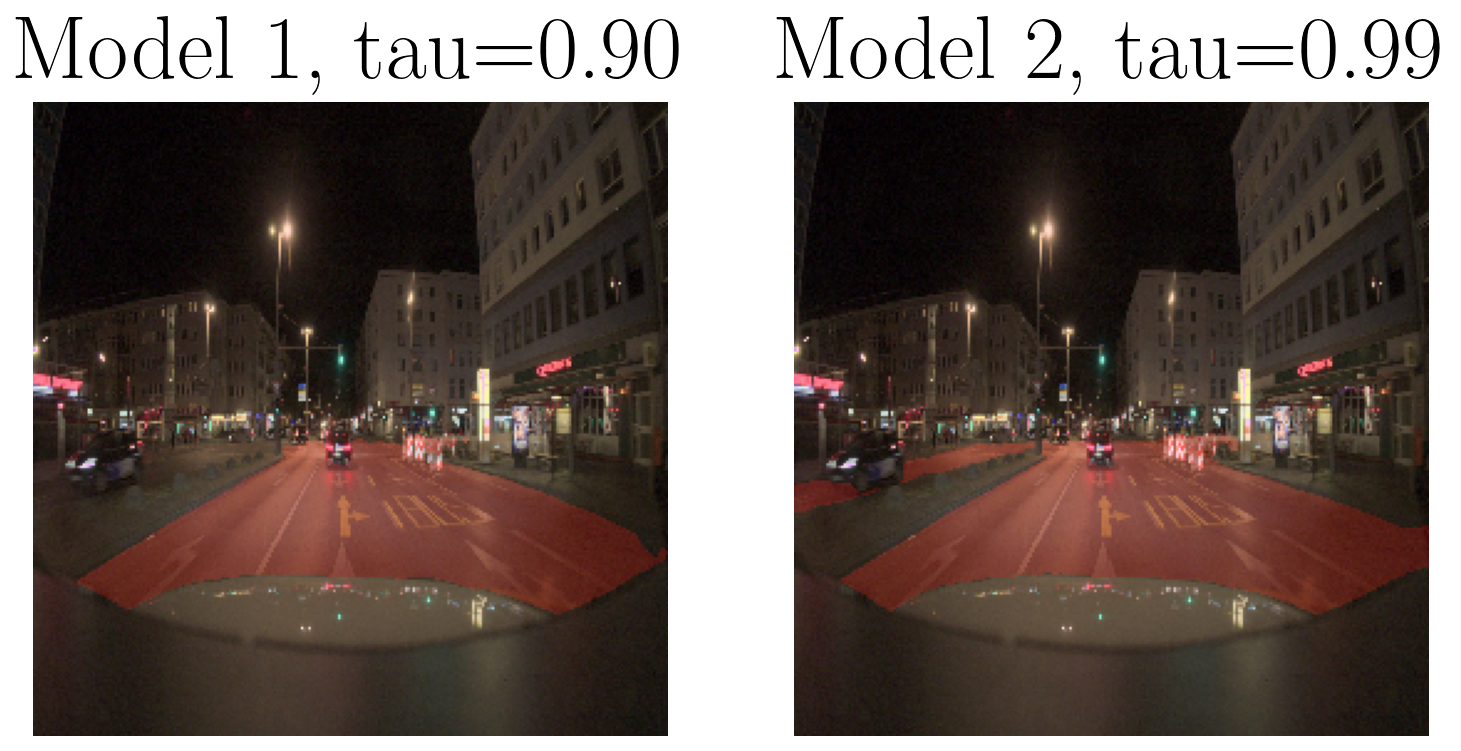

In [97]:
from zod.visualization.polygon_utils import overlay_mask_on_image
from segmentation_models_pytorch.losses import DiceLoss

plt.rcParams['figure.dpi'] = 300

image, label = platform.data.central.val.dataset[16]
# model 1, tau=0.90
predictions = model(image.unsqueeze(0).cuda())
predictions = predictions.squeeze(0).detach().cpu().numpy()
mask = (predictions > 0.5).astype("uint8")
# model 2 tau=0.99
predictions_2 = model_2(image.unsqueeze(0).cuda())
predictions_2 = predictions_2.squeeze(0).detach().cpu().numpy()
mask_2 = (predictions_2 > 0.5).astype("uint8")

image = image.numpy()

# overlay the mask on the image
to_plottable = lambda image: ((image - image.min()) / (image.max() - image.min()) * 255).astype("uint8").transpose(1, 2, 0)

rendered_image = overlay_mask_on_image(mask, to_plottable(image), fill_color=(100, 0, 0), alpha=0.5)
rendered_image_2 = overlay_mask_on_image(mask_2, to_plottable(image), fill_color=(100, 0, 0), alpha=0.5)

# visualize the mask
# plot loss as title
plt.subplot(1, 2, 1)
plt.axis("off")
plt.imshow(rendered_image)
plt.title("Model 1, tau=0.90")
plt.subplot(1, 2, 2)
plt.imshow(rendered_image_2)
plt.title("Model 2, tau=0.99")
plt.axis("off")
plt.show()